In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Display numbers in 2 decimal places
# Source: https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Load Preprocessed Dataset
df = pd.read_csv('/content/drive/MyDrive/Research - Summer 2024/ridership_with_weather_dataset_preprocessed.csv')
df.head()

,Station Id,Check-Outs,Check-Ins,Year,Month,Day,Hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),...,Wind Spd (km/h),Visibility (km),Stn Press (kPa),Smoke,Rain-related,Snow-related,Clear/Cloudy,Obstructive,Freezing,Extreme
0,7000,0,1,2019,1,1,1,4.40,3.60,94.00,...,7.00,9.70,97.32,0,0,0,0,1,0,0
1,7000,0,2,2019,1,1,2,2.40,1.50,94.00,...,35.00,9.70,97.54,0,1,0,0,1,0,0
2,7000,2,0,2019,1,1,7,1.30,-1.00,84.00,...,27.00,24.10,99.04,0,0,0,1,0,0,0
3,7000,3,0,2019,1,1,11,-1.00,-5.00,75.00,...,28.00,24.10,99.77,0,0,0,1,0,0,0
4,7000,4,0,2019,1,1,15,-1.70,-7.30,66.00,...,25.00,24.10,100.10,0,0,0,1,0,0,0


Filter top 15 stations and remove previously decided unwanted features

In [ ]:
# List of top 15 "Station Id" with most datapoints
list_of_stn = list(df["Station Id"].value_counts().head(15).index)

df = df[df["Station Id"].isin(list_of_stn)]

In [ ]:
df.drop(columns=['Dew Point Temp (°C)'], inplace=True)
df.drop(columns=['Stn Press (kPa)', 'Wind Dir (10s deg)'], inplace=True)

# Shift "Smoke" column to back of dataframe
smoke_column = df.pop('Smoke')
df.insert(len(df.columns), 'Smoke', smoke_column)

df.head()

<ipython-input-5-7fd4da58674e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Dew Point Temp (°C)'], inplace=True)
<ipython-input-5-7fd4da58674e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Stn Press (kPa)', 'Wind Dir (10s deg)'], inplace=True)


,Station Id,Check-Outs,Check-Ins,Year,Month,Day,Hour,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Rain-related,Snow-related,Clear/Cloudy,Obstructive,Freezing,Extreme,Smoke
125859,7006,1,0,2019,1,1,11,-1.00,75.00,28.00,24.10,0,0,1,0,0,0,0
125860,7006,0,2,2019,1,1,12,-1.60,72.00,28.00,24.10,0,0,1,0,0,0,0
125861,7006,0,1,2019,1,1,13,-0.70,70.00,29.00,24.10,0,0,1,0,0,0,0
125862,7006,2,0,2019,1,1,14,-0.70,66.00,30.00,24.10,0,0,1,0,0,0,0
125863,7006,0,1,2019,1,1,15,-1.70,66.00,25.00,24.10,0,0,1,0,0,0,0


Setup training and testing dataset

In [ ]:
from sklearn.utils import shuffle

# Shuffle data within each year group before splitting
train_data = shuffle(df[df['Year'] < 2023], random_state=42)
test_data = shuffle(df[df['Year'] == 2023], random_state=42)

print(len(train_data))
print(len(test_data))

# Split the data into features and targets
X_train = train_data.drop(['Check-Outs', 'Check-Ins'], axis=1)
y_checkouts_train = train_data['Check-Outs']
y_checkins_train = train_data['Check-Ins']

X_test = test_data.drop(['Check-Outs', 'Check-Ins'], axis=1)
y_checkouts_test = test_data['Check-Outs']
y_checkins_test = test_data['Check-Ins']

272774
108011


# Checkouts

For every type of model, the model is trained with the training data. The MAE, MSE and R2 are calculated for the test data. The R2 score is then used to compare between the models.
The prediction for the first datapoint in the test set is then determined using the model for good measure.

**Linear/Ridge Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_checkouts = LinearRegression()
lr_checkouts.fit(X_train, y_checkouts_train)

checkouts_preds = lr_checkouts.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

new_data = X_test.iloc[0]
checkouts_prediction = lr_checkouts.predict([new_data])
print("Predicted Check-Outs:", checkouts_prediction)

Check-Outs - MAE: 2.35039448975083 MSE: 12.217035277448884 R2: 0.2343309608250772
Predicted Check-Outs: [4.9543356]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import Ridge

ridge_checkouts = Ridge(alpha=5.0)
ridge_checkouts.fit(X_train, y_checkouts_train)

checkouts_preds = ridge_checkouts.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

new_data = X_test.iloc[0]
checkouts_prediction = ridge_checkouts.predict([new_data])
print("Predicted Check-Outs:", checkouts_prediction)

Check-Outs - MAE: 2.350390692736141 MSE: 12.217044439129326 R2: 0.23433038664198758
Predicted Check-Outs: [4.95434174]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_checkouts = RandomForestRegressor(n_estimators=500, random_state=42, verbose=1)
rf_checkouts.fit(X_train, y_checkouts_train)

checkouts_preds = rf_checkouts.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

new_data = X_test.iloc[0]
checkouts_prediction = rf_checkouts.predict([new_data])
print("Predicted Check-Outs:", checkouts_prediction)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.9min
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed: 13.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   25.2s


Check-Outs - MAE: 1.973137717454704 MSE: 8.462823013470851 R2: 0.4696158750239181
Predicted Check-Outs: [7.708]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_checkouts = GradientBoostingRegressor(n_estimators=900, learning_rate=0.015, random_state=42, max_depth=8, max_features='sqrt', subsample=1.0)
gb_checkouts.fit(X_train, y_checkouts_train)

checkouts_preds = gb_checkouts.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

new_data = X_test.iloc[0]
checkouts_prediction = gb_checkouts.predict([new_data])
print("Predicted Check-Outs:", checkouts_prediction)

Check-Outs - MAE: 1.9153023546357282 MSE: 8.077796787240068 R2: 0.49374633335528084
Predicted Check-Outs: [8.10917967]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


**Support Vector Regression**

In [ ]:
from sklearn.svm import LinearSVR

svr_checkouts = LinearSVR(random_state=42)
svr_checkouts.fit(X_train, y_checkouts_train)

checkouts_preds = svr_checkouts.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

new_data = X_test.iloc[0]
checkouts_prediction = svr_checkouts.predict([new_data])
print("Predicted Check-Outs:", checkouts_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Check-Outs - MAE: 2.7220618550172446 MSE: 16.88106189859692 R2: -0.05797406249694603
Predicted Check-Outs: [3.25521853]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_checkouts = KNeighborsRegressor(n_neighbors=100)
knn_checkouts.fit(X_train, y_checkouts_train)

checkouts_preds = knn_checkouts.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

new_data = X_test.iloc[0]
checkouts_prediction = knn_checkouts.predict([new_data])
print("Predicted Check-Outs:", checkouts_prediction)

Check-Outs - MAE: 2.177771152938127 MSE: 11.179713031080166 R2: 0.299342275735331
Predicted Check-Outs: [4.97]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


**XGBoost Regressor**

In [ ]:
import xgboost as xgb

xgb_checkouts = xgb.XGBRegressor(n_estimators=1000,
                                 random_state=42,
                                 colsample_bytree=1,
                                 learning_rate=0.2,
                                 max_depth=6,
                                 subsample=1,
                                 reg_lambda=1.0, # L2 regularization
                                 reg_alpha=0.01) # L1 regularization
xgb_checkouts.fit(X_train, y_checkouts_train)

checkouts_preds = xgb_checkouts.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

new_data = X_test.iloc[0]
checkouts_prediction = xgb_checkouts.predict([new_data])
print("Predicted Check-Outs:", checkouts_prediction)

Check-Outs - MAE: 1.950523309963541 MSE: 8.2105513000134 R2: 0.4854263098853546
Predicted Check-Outs: [8.3969755]


# Checkins

For every type of model, the model is trained with the training data. The MAE, MSE and R2 are calculated for the test data. The R2 score is then used to compare between the models.
The prediction for the first datapoint in the test set is then determined using the model for good measure.

**Linear/Ridge Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_checkins = LinearRegression()
lr_checkins.fit(X_train, y_checkins_train)

checkins_preds = lr_checkins.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

new_data = X_test.iloc[0]
checkins_prediction = lr_checkins.predict([new_data])
print("Predicted Check-ins:", checkins_prediction)

Check-ins - MAE: 2.5325234945621826 MSE: 15.200670798603664 R2: 0.21408963918733193
Predicted Check-ins: [5.23036802]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import Ridge

ridge_checkins = Ridge(alpha=5.0)
ridge_checkins.fit(X_train, y_checkins_train)

checkins_preds = ridge_checkins.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

new_data = X_test.iloc[0]
checkins_prediction = ridge_checkins.predict([new_data])
print("Predicted Check-ins:", checkins_prediction)

Check-ins - MAE: 2.532519639196434 MSE: 15.20068511303111 R2: 0.21408889909783269
Predicted Check-ins: [5.23037728]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_checkins = RandomForestRegressor(n_estimators=500, random_state=42, verbose=1)
rf_checkins.fit(X_train, y_checkins_train)

checkins_preds = rf_checkins.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

new_data = X_test.iloc[0]
checkins_prediction = rf_checkins.predict([new_data])
print("Predicted Check-ins:", checkins_prediction)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.5min
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed: 12.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   20.1s


Check-ins - MAE: 2.0927887159641148 MSE: 10.233656517613948 R2: 0.4708959365839501
Predicted Check-ins: [6.626]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_checkins = GradientBoostingRegressor(n_estimators=900, learning_rate=0.015, random_state=42, max_depth=8, max_features='sqrt', subsample=1.0)
gb_checkins.fit(X_train, y_checkins_train)

checkins_preds = gb_checkins.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

new_data = X_test.iloc[0]
checkins_prediction = gb_checkins.predict([new_data])
print("Predicted Check-ins:", checkins_prediction)

Check-ins - MAE: 2.0455976259573663 MSE: 10.153984392561812 R2: 0.4750151724634738
Predicted Check-ins: [7.77837391]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


**Support Vector Regression**

In [ ]:
from sklearn.svm import LinearSVR

svr_checkins = LinearSVR(random_state=42)
svr_checkins.fit(X_train, y_checkins_train)

checkins_preds = svr_checkins.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

new_data = X_test.iloc[0]
checkins_prediction = svr_checkins.predict([new_data])
print("Predicted Check-ins:", checkins_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Check-ins - MAE: 3.6602872733533314 MSE: 27.158568005033185 R2: -0.4041617151495509
Predicted Check-ins: [2.35733452]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_checkins = KNeighborsRegressor(n_neighbors=100)
knn_checkins.fit(X_train, y_checkins_train)

checkins_preds = knn_checkins.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

new_data = X_test.iloc[0]
checkins_prediction = knn_checkins.predict([new_data])
print("Predicted Check-ins:", checkins_prediction)

Check-ins - MAE: 2.3345014859597635 MSE: 13.958682756385922 R2: 0.2783033362877275
Predicted Check-ins: [5.12]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


**XGBoost Regressor**

In [ ]:
import xgboost as xgb

xgb_checkins = xgb.XGBRegressor(n_estimators=1000,
                                 random_state=42)
xgb_checkins.fit(X_train, y_checkins_train)

checkins_preds = xgb_checkins.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

new_data = X_test.iloc[0]
checkins_prediction = xgb_checkins.predict([new_data])
print("Predicted Check-ins:", checkins_prediction)

Check-ins - MAE: 2.0994481324801257 MSE: 10.266744527240629 R2: 0.4691852088187868
Predicted Check-ins: [7.164379]


# Hyperparameter Tuning

Top 2 models (highest 2 R2 score) will be tuned to achieve highest R2 scoring model

- Gradient Boosting Regressor
- XGBoost Regressor

**Check-outs**

*XGBRegressor*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [900, 1000],
    'max_depth': [1, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.1, 0.6],
    'colsample_bytree': [0.6, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)

rand_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=3, n_iter=10, scoring='r2', verbose=2, n_jobs=-1)

rand_search.fit(X_train, y_checkouts_train)

print("Best Parameters:", rand_search.best_params_)
print("Best R2 Score:", rand_search.best_score_)

best_model = rand_search.best_estimator_

checkouts_preds = best_model.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best R2 Score: 0.5556789972439572
Check-Outs - MAE: 1.9295921733467758 MSE: 8.079101593968957 R2: 0.49366455818710553


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.6, 1.0]
}

xgb_model = xgb.XGBRegressor(n_estimators=1000, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_checkouts_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

checkouts_preds = best_model.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'subsample': 1.0}
Best R2 Score: 0.5675357321755298
Check-Outs - MAE: 1.9464551459596329 MSE: 8.255662239449114 R2: 0.48259910599589895


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'max_depth': [10, 15],
    'learning_rate': [0.01, 0.05]
}

xgb_model = xgb.XGBRegressor(n_estimators=1000, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2)

grid_search.fit(X_train, y_checkouts_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

checkouts_preds = best_model.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...................learning_rate=0.01, max_depth=10; total time=  52.9s
[CV] END ...................learning_rate=0.01, max_depth=10; total time=  48.8s
[CV] END ...................learning_rate=0.01, max_depth=10; total time=  49.4s
[CV] END ...................learning_rate=0.01, max_depth=15; total time= 3.9min
[CV] END ...................learning_rate=0.01, max_depth=15; total time= 3.8min
[CV] END ...................learning_rate=0.01, max_depth=15; total time= 4.7min
[CV] END ...................learning_rate=0.05, max_depth=10; total time=  51.8s
[CV] END ...................learning_rate=0.05, max_depth=10; total time=  48.7s
[CV] END ...................learning_rate=0.05, max_depth=10; total time=  44.5s
[CV] END ...................learning_rate=0.05, max_depth=15; total time= 3.1min
[CV] END ...................learning_rate=0.05, max_depth=15; total time= 2.9min
[CV] END ...................learning_rate=0.05, m

NameError: name 'mean_absolute_error' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'learning_rate': [0.005, 0.01]
}

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=10, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2)

grid_search.fit(X_train, y_checkouts_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

checkouts_preds = best_model.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ................................learning_rate=0.005; total time=  58.5s
[CV] END ................................learning_rate=0.005; total time=  59.2s
[CV] END ................................learning_rate=0.005; total time= 1.0min
[CV] END .................................learning_rate=0.01; total time=  54.8s
[CV] END .................................learning_rate=0.01; total time=  50.0s
[CV] END .................................learning_rate=0.01; total time=  53.7s
Best Parameters: {'learning_rate': 0.01}
Best R2 Score: 0.5696298016642842
Check-Outs - MAE: 1.9131548522456532 MSE: 8.006881068154744 R2: 0.4981907807405386


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'reg_lambda': [0.5, 1.0],
    'reg_alpha': [0.1, 1.0]
}

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.01, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2)

grid_search.fit(X_train, y_checkouts_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

checkouts_preds = best_model.predict(X_test)

mae_checkouts = mean_absolute_error(y_checkouts_test, checkouts_preds)
mse_checkouts = mean_squared_error(y_checkouts_test, checkouts_preds)
r2_checkouts = r2_score(y_checkouts_test, checkouts_preds)

print("Check-Outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ......................reg_alpha=0.1, reg_lambda=0.5; total time= 1.0min
[CV] END ......................reg_alpha=0.1, reg_lambda=0.5; total time=  53.6s
[CV] END ......................reg_alpha=0.1, reg_lambda=0.5; total time=  52.1s
[CV] END ......................reg_alpha=0.1, reg_lambda=1.0; total time=  54.1s
[CV] END ......................reg_alpha=0.1, reg_lambda=1.0; total time=  49.2s
[CV] END ......................reg_alpha=0.1, reg_lambda=1.0; total time= 1.3min
[CV] END ......................reg_alpha=1.0, reg_lambda=0.5; total time= 1.1min
[CV] END ......................reg_alpha=1.0, reg_lambda=0.5; total time=  49.2s
[CV] END ......................reg_alpha=1.0, reg_lambda=0.5; total time=  50.1s
[CV] END ......................reg_alpha=1.0, reg_lambda=1.0; total time=  50.9s
[CV] END ......................reg_alpha=1.0, reg_lambda=1.0; total time=  49.4s
[CV] END ......................reg_alpha=1.0, reg

*Gradient Boosting Regressor*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_distributions = {
    'n_estimators': [100, 1000],
    'max_depth': [3, 10],
    'learning_rate': [0.001, 0.1],  # Log scale from 0.001 to 1
    'subsample': [0.6, 1.0]
}

gbr_model = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_checkouts_train)

print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

best_model = random_search.best_estimator_

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_checkouts_test, preds)
mse = mean_squared_error(y_checkouts_test, preds)
r2 = r2_score(y_checkouts_test, preds)

print("MAE:", mae, "MSE:", mse, "R2:", r2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=  23.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=  18.5s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=  18.9s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=  27.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=  26.5s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=  26.6s
[CV] END learning_rate=0.001, max_depth=10, n_estimators=100, subsample=1.0; total time= 1.3min
[CV] END learning_rate=0.001, max_depth=10, n_estimators=100, subsample=1.0; total time= 1.4min
[CV] END learning_rate=0.001, max_depth=10, n_estimators=100, subsample=1.0; total time= 1.4min
[CV] END learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.6; total

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 12],
    'learning_rate': [0.1, 0.2]
}

gbr_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_checkouts_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_checkouts_test, preds)
mse = mean_squared_error(y_checkouts_test, preds)
r2 = r2_score(y_checkouts_test, preds)

print("MAE:", mae, "MSE:", mse, "R2:", r2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time= 1.4min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time= 1.4min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time= 1.4min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time= 2.7min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time= 2.8min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time= 2.8min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=100; total time= 1.6min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=100; total time= 1.6min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=100; total time= 1.7min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=200; total time= 3.2min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=200; total time= 3.3min
[CV] END ..learning_rate=0.1, max_depth=12, n_est

**Check-ins**

*XGBRegressor*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [1, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.1, 0.6],
    'colsample_bytree': [0.6, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)

rand_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=3, n_iter=10, scoring='r2', verbose=2)

rand_search.fit(X_train, y_checkins_train)

print("Best Parameters:", rand_search.best_params_)
print("Best R2 Score:", rand_search.best_score_)

best_model = rand_search.best_estimator_

checkins_preds = best_model.predict(X_test)

mae_checkins = mean_absolute_error(y_checkins_test, checkins_preds)
mse_checkins = mean_squared_error(y_checkins_test, checkins_preds)
r2_checkins = r2_score(y_checkins_test, checkins_preds)

print("Check-ins - MAE:", mae_checkins, "MSE:", mse_checkins, "R2:", r2_checkins)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=1, n_estimators=100, subsample=0.6; total time=   5.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=1, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=1, n_estimators=100, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=1, n_estimators=1000, subsample=0.6; total time=  10.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=1, n_estimators=1000, subsample=0.6; total time=  11.7s
[CV] END colsampl

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_grid = {
    'subsample': [0.6, 1.0],
    'max_depth': [6, 10],
    'learning_rate': [0.05, 0.1]
}

xgb_model = xgb.XGBRegressor(n_estimators=1000, colsample_bytree=0.6, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_checkins_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_checkins_test, preds)
mse = mean_squared_error(y_checkins_test, preds)
r2 = r2_score(y_checkins_test, preds)

print("MAE:", mae, "MSE:", mse, "R2:", r2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....learning_rate=0.05, max_depth=6, subsample=0.6; total time=  23.1s
[CV] END .....learning_rate=0.05, max_depth=6, subsample=0.6; total time=  20.7s
[CV] END .....learning_rate=0.05, max_depth=6, subsample=0.6; total time=  20.6s
[CV] END .....learning_rate=0.05, max_depth=6, subsample=1.0; total time=  17.4s
[CV] END .....learning_rate=0.05, max_depth=6, subsample=1.0; total time=  19.4s
[CV] END .....learning_rate=0.05, max_depth=6, subsample=1.0; total time=  18.6s
[CV] END ....learning_rate=0.05, max_depth=10, subsample=0.6; total time=  43.6s
[CV] END ....learning_rate=0.05, max_depth=10, subsample=0.6; total time=  43.2s
[CV] END ....learning_rate=0.05, max_depth=10, subsample=0.6; total time=  43.2s
[CV] END ....learning_rate=0.05, max_depth=10, subsample=1.0; total time=  39.5s
[CV] END ....learning_rate=0.05, max_depth=10, subsample=1.0; total time=  46.3s
[CV] END ....learning_rate=0.05, max_depth=10, su

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_grid = {
    'max_depth': [10, 12],
    'learning_rate': [0.01, 0.05]
}

xgb_model = xgb.XGBRegressor(n_estimators=1000, colsample_bytree=0.6, subsample=1.0, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_checkins_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_checkins_test, preds)
mse = mean_squared_error(y_checkins_test, preds)
r2 = r2_score(y_checkins_test, preds)

print("MAE:", mae, "MSE:", mse, "R2:", r2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...................learning_rate=0.01, max_depth=10; total time=  49.3s
[CV] END ...................learning_rate=0.01, max_depth=10; total time=  49.9s
[CV] END ...................learning_rate=0.01, max_depth=10; total time=  49.4s
[CV] END ...................learning_rate=0.01, max_depth=12; total time= 1.4min
[CV] END ...................learning_rate=0.01, max_depth=12; total time= 1.4min
[CV] END ...................learning_rate=0.01, max_depth=12; total time= 1.4min
[CV] END ...................learning_rate=0.05, max_depth=10; total time=  38.9s
[CV] END ...................learning_rate=0.05, max_depth=10; total time=  36.1s
[CV] END ...................learning_rate=0.05, max_depth=10; total time=  39.5s
[CV] END ...................learning_rate=0.05, max_depth=12; total time= 1.1min
[CV] END ...................learning_rate=0.05, max_depth=12; total time=  59.0s
[CV] END ...................learning_rate=0.05, m

*Gradient Boosting Regressor*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_distributions = {
    'n_estimators': [100, 1000],
    'max_depth': [3, 10],
    'learning_rate': [0.001, 0.1],  # Log scale from 0.001 to 1
    'subsample': [0.6, 1.0]
}

gbr_model = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_checkins_train)

print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

best_model = random_search.best_estimator_

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_checkins_test, preds)
mse = mean_squared_error(y_checkins_test, preds)
r2 = r2_score(y_checkins_test, preds)

print("MAE:", mae, "MSE:", mse, "R2:", r2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=  19.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=  18.5s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=  18.9s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=  26.9s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=  27.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=  27.3s
[CV] END learning_rate=0.001, max_depth=10, n_estimators=100, subsample=1.0; total time= 1.4min
[CV] END learning_rate=0.001, max_depth=10, n_estimators=100, subsample=1.0; total time= 1.4min
[CV] END learning_rate=0.001, max_depth=10, n_estimators=100, subsample=1.0; total time= 1.4min
[CV] END learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.6; total

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 12],
    'learning_rate': [0.1, 0.2]
}

gbr_model = GradientBoostingRegressor(subsample=1.0, random_state=42)

grid_search = GridSearchCV(
    estimator=gbr_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_checkins_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_checkins_test, preds)
mse = mean_squared_error(y_checkins_test, preds)
r2 = r2_score(y_checkins_test, preds)

print("MAE:", mae, "MSE:", mse, "R2:", r2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time= 1.8min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time= 1.5min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time= 1.4min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time= 2.8min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time= 2.9min
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time= 2.9min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=100; total time= 1.7min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=100; total time= 1.7min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=100; total time= 1.7min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=200; total time= 3.4min
[CV] END ..learning_rate=0.1, max_depth=12, n_estimators=200; total time= 3.4min
[CV] END ..learning_rate=0.1, max_depth=12, n_est

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 500, 1000]
}

gbr_model = GradientBoostingRegressor(subsample=1.0, max_depth=10, learning_rate=0.1, random_state=42)

grid_search = GridSearchCV(
    estimator=gbr_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_checkins_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

preds = best_model.predict(X_test)

mae = mean_absolute_error(y_checkins_test, preds)
mse = mean_squared_error(y_checkins_test, preds)
r2 = r2_score(y_checkins_test, preds)

print("MAE:", mae, "MSE:", mse, "R2:", r2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...................................n_estimators=100; total time= 1.5min
[CV] END ...................................n_estimators=100; total time= 1.4min
[CV] END ...................................n_estimators=100; total time= 1.3min
[CV] END ...................................n_estimators=200; total time= 2.8min
[CV] END ...................................n_estimators=200; total time= 2.7min
[CV] END ...................................n_estimators=200; total time= 2.7min
[CV] END ...................................n_estimators=500; total time= 6.6min
[CV] END ...................................n_estimators=500; total time= 6.7min
[CV] END ...................................n_estimators=500; total time= 6.8min
[CV] END ..................................n_estimators=1000; total time=13.4min
[CV] END ..................................n_estimators=1000; total time=13.6min
[CV] END ..................................n_esti

# Training of Final Models

**Check-outs**

Chosen Model: XGBRegressor

Chosen Hyperparameters:
- n_estimators=1000
- max_depth=10
- learning_rate=0.01
- reg_alpha=1.0
- reg_lambda=1.0

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.utils import shuffle

X = df.drop(columns=['Check-Outs', 'Check-Ins'])
y = df['Check-Outs']

checkouts_model = XGBRegressor(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.01,
    reg_alpha=1.0,
    reg_lambda=1.0,
    verbosity=1
)

checkouts_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import joblib

model_filename = '/content/drive/MyDrive/Research - Summer 2024/checkouts_model.pkl'

joblib.dump(checkouts_model, model_filename)

['/content/drive/MyDrive/Research - Summer 2024/checkouts_model.pkl']

**Check-ins**

Chosen Model: GradientBoostingRegressor

Chosen Hyperparameters:
- n_estimators=100
- max_depth=10
- learning_rate=0.1
- subsample=1.0

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop(columns=['Check-Outs', 'Check-Ins'])
y = df['Check-Ins']

checkins_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=1.0 # Default
)

checkins_model.fit(X, y)

GradientBoostingRegressor(max_depth=10)

In [ ]:
import joblib

model_filename = '/content/drive/MyDrive/Research - Summer 2024/checkins_model.pkl'

joblib.dump(checkins_model, model_filename)

['/content/drive/MyDrive/Research - Summer 2024/checkins_model.pkl']

# Prediction for 2024 Ridership Dataset

**Load models**

In [ ]:
import joblib

# Load check-outs and check-ins model using joblib
checkouts_model = joblib.load('/content/drive/MyDrive/Research - Summer 2024/checkouts_model.pkl')
checkins_model = joblib.load('/content/drive/MyDrive/Research - Summer 2024/checkins_model.pkl')

**Load 2024 Ridership Data for Testing (Jan and Feb)**

In [ ]:
ridership_2024_jan_feb = pd.read_csv('/content/drive/MyDrive/Research - Summer 2024/ridership_2024_with_weather_dataset_preprocessed.csv')

In [ ]:
from sklearn.utils import shuffle

# Shuffle data within each year group before splitting
X_test = ridership_2024_jan_feb.drop(columns=['Check-Outs', 'Check-Ins'])
y_test_checkouts = ridership_2024_jan_feb["Check-Outs"]
y_test_checkins = ridership_2024_jan_feb["Check-Ins"]

print(X_test.shape)
print(y_test_checkouts.shape)
print(y_test_checkins.shape)

(7977, 16)
(7977,)
(7977,)


*Check-outs*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

checkouts_preds_2024_jan_feb = checkouts_model.predict(X_test)

# Calculate metrics
mae_checkouts = mean_absolute_error(y_test_checkouts, checkouts_preds_2024_jan_feb)
mse_checkouts = mean_squared_error(y_test_checkouts, checkouts_preds_2024_jan_feb)
r2_checkouts = r2_score(y_test_checkouts, checkouts_preds_2024_jan_feb)

print("Check-outs - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

Check-outs - MAE: 1.2096030254940184 MSE: 2.8595583623103322 R2: 0.2894320552832751


*Check-ins*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

checkins_preds_2024_jan_feb = checkins_model.predict(X_test)

# Calculate metrics
mae_checkouts = mean_absolute_error(y_test_checkins, checkins_preds_2024_jan_feb)
mse_checkouts = mean_squared_error(y_test_checkins, checkins_preds_2024_jan_feb)
r2_checkouts = r2_score(y_test_checkins, checkins_preds_2024_jan_feb)

print("Check-ins - MAE:", mae_checkouts, "MSE:", mse_checkouts, "R2:", r2_checkouts)

Check-ins - MAE: 1.214530382218688 MSE: 2.9988204054631877 R2: 0.3451623867805045


**Load 2024 Ridership Data for Prediction (Mar)**

In [ ]:
ridership_2024_march = pd.read_csv('/content/drive/MyDrive/Research - Summer 2024/ridership_2024_March.csv')

*Check-outs*

In [ ]:
checkouts_preds_2024_march = checkouts_model.predict(ridership_2024_march)

In [ ]:
checkouts_preds_2024_march

array([0.7969459 , 0.64442825, 0.6065862 , ..., 1.2657021 , 1.3984376 ,
       2.6343122 ], dtype=float32)

(array([5.127e+03, 4.464e+03, 1.147e+03, 3.090e+02, 6.500e+01, 1.400e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.23761843,  1.70360804,  3.64483452,  5.586061  ,  7.52728748,
         9.46851444, 11.40974045, 13.35096741, 15.29219341, 17.23341942,
        19.17464638]),
 <BarContainer object of 10 artists>)

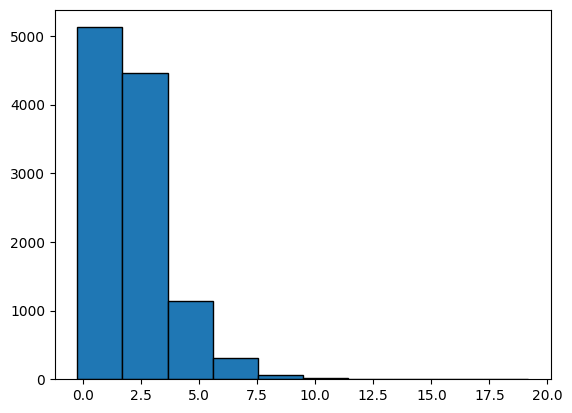

In [ ]:
# Plot histogram for checkouts_preds_2024_march
import matplotlib.pyplot as plt

plt.hist(checkouts_preds_2024_march, bins=10, edgecolor='black')

*Check-ins*

In [ ]:
checkins_preds_2024_march = checkins_model.predict(ridership_2024_march)

In [ ]:
checkins_preds_2024_march

array([1.35308746, 1.31940913, 1.14442466, ..., 0.77350487, 1.72783128,
       3.02088541])

(array([3.368e+03, 4.071e+03, 2.353e+03, 9.300e+02, 2.870e+02, 9.400e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.46962326,  1.11288038,  2.69538402,  4.27788766,  5.8603913 ,
         7.44289495,  9.02539859, 10.60790223, 12.19040587, 13.77290951,
        15.35541315]),
 <BarContainer object of 10 artists>)

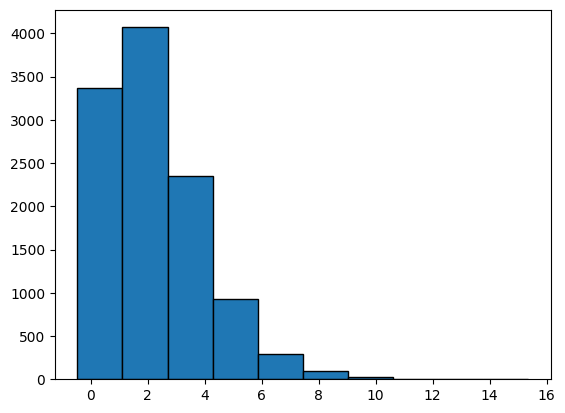

In [ ]:
# Plot histogram for checkouts_preds_2024_march
import matplotlib.pyplot as plt

plt.hist(checkins_preds_2024_march, bins=10, edgecolor='black')

# Analysis of Ridership March 2024 Predictions

In [ ]:
ridership_2024_march_full_pred = pd.concat([ridership_2024_march,
                                            pd.DataFrame(checkouts_preds_2024_march, columns=['Check-Outs']),
                                            pd.DataFrame(checkins_preds_2024_march, columns=['Check-Ins'])],
                                            axis=1)

In [ ]:
ridership_2024_march_full_pred

,Station Id,Year,Month,Day,Hour,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Rain-related,Snow-related,Clear/Cloudy,Obstructive,Freezing,Extreme,Smoke,Check-Outs,Check-Ins
0,7006,2024,3,1,0,-4.40,62.00,10.00,24.10,0.00,0.00,1,0,0,0,0,0.80,1.35
1,7006,2024,3,1,1,-3.90,60.00,4.00,24.10,0.00,0.00,1,0,0,0,0,0.64,1.32
2,7006,2024,3,1,2,-3.90,60.00,5.00,24.10,0.00,0.00,1,0,0,0,0,0.61,1.14
3,7006,2024,3,1,3,-3.50,61.00,9.00,24.10,0.00,0.00,1,0,0,0,0,0.56,1.25
4,7006,2024,3,1,4,-3.20,63.00,7.00,24.10,0.00,0.00,1,0,0,0,0,0.57,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,7102,2024,3,31,4,2.10,74.00,17.00,24.10,0.00,0.00,1,0,0,0,0,0.27,1.03
11126,7102,2024,3,31,5,1.60,75.00,16.00,24.10,0.00,0.00,1,0,0,0,0,0.50,0.79
11127,7102,2024,3,31,6,2.00,75.00,15.00,24.10,0.00,0.00,1,0,0,0,0,1.27,0.77
11128,7102,2024,3,31,7,2.40,71.00,15.00,24.10,0.00,0.00,1,0,0,0,0,1.40,1.73


In [ ]:
ridership_2024_march_full_pred.to_csv('/content/drive/MyDrive/Research - Summer 2024/ridership_2024_march_full_pred.csv', index=False)

In [5]:
ridership_2024_march_full_pred = pd.read_csv('/content/drive/MyDrive/Research - Summer 2024/ridership_2024_march_full_pred.csv')

Comparing Hourly, Daily and Monthly Check-Outs and Check-Ins against Station Capacities

In [6]:
import pandas as pd
import requests

url = 'https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information'
response = requests.get(url)
data = response.json()

station_ids = [7006, 7033, 7121, 7100, 7076, 7022, 7030, 7007, 7044, 7089, 7389, 7078, 7038, 7253, 7102]

stations = data['data']['stations']

stations_df = pd.DataFrame(stations)

filtered_stations = stations_df[stations_df['station_id'].isin(map(str, station_ids))]

station_capacity = filtered_stations[['station_id', 'capacity']]

station_capacity['station_id'] = station_capacity['station_id'].astype(int)

station_capacity.reset_index(drop=True, inplace=True)
station_capacity

<ipython-input-6-7156df78a9c9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_capacity['station_id'] = station_capacity['station_id'].astype(int)


,station_id,capacity
0,7006,31
1,7007,19
2,7022,39
3,7030,35
4,7033,43
5,7038,31
6,7044,35
7,7076,57
8,7078,15
9,7089,27


In [7]:
ridership_2024_march_full_pred.columns

Index(['Station Id', 'Year', 'Month', 'Day', 'Hour', 'Temp (°C)',
       'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Rain-related',
       'Snow-related', 'Clear/Cloudy', 'Obstructive', 'Freezing', 'Extreme',
       'Smoke', 'Check-Outs', 'Check-Ins'],
      dtype='object')

In [13]:
# For all "Station Id", find the max "Check-Outs" and "Check-Ins"

compare_df = {"Station Id": [],
              "Capacity": [],
              "Check-Outs": [],
              "Check-In": []}

for stn_id in ridership_2024_march_full_pred["Station Id"].unique():
    max_checkouts = ridership_2024_march_full_pred.loc[ridership_2024_march_full_pred["Station Id"] == stn_id, "Check-Outs"].max()
    max_checkins = ridership_2024_march_full_pred.loc[ridership_2024_march_full_pred["Station Id"] == stn_id, "Check-Ins"].max()
    compare_df["Station Id"].append(stn_id)
    compare_df["Capacity"].append(station_capacity.loc[station_capacity["station_id"] == stn_id, "capacity"].values[0])
    compare_df["Check-Outs"].append(max_checkouts)
    compare_df["Check-In"].append(max_checkins)

compare_df = pd.DataFrame(compare_df)
compare_df

,Station Id,Capacity,Check-Outs,Check-In
0,7006,31,11.17,10.46
1,7033,43,8.82,11.42
2,7121,27,5.54,5.66
3,7100,27,8.33,10.98
4,7076,57,19.17,15.36
5,7022,39,8.09,10.03
6,7030,35,8.20,6.71
7,7007,19,7.42,6.71
8,7044,35,3.69,5.09
9,7089,27,6.47,7.45
